In [2]:
print("Hello, I'm currently perticipating in The Data Forge: Workshop and Contest.")

Hello, I'm currently perticipating in The Data Forge: Workshop and Contest.


Setting up libraries and installing packages

In [8]:
#To install a library:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nltk
!pip install scikit-lear
!pip install seaborn

#We use a short name since it is easier to refer to the package to access functions and also to refer to subpackages within the library.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns

     ---------------------------------------- 10.7/10.7 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 502.5/502.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 3.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.6/7.6 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 186.7/186.7 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 269.6/269.6 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB ? eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 9.3/9.3 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 3.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.6/294.6 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


We will use pandas to read the data from the csv file using the read_csv function. This function returns a pandas dataframe. We will store this dataframe in a variable called df.

In [9]:
url = 'https://raw.githubusercontent.com/meghjoshii/NSDC_DataScienceProjects_SentimentAnalysis/main/IMDB%20Dataset.csv'

In [10]:
data = pd.read_csv(url)

In [11]:
# TODO: Print the first 5 rows of the data using head function of pandas

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
# TODO: Describe the data using describe function of pandas

data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [13]:
print(data['review'])

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


In [14]:
# TODO: Use the value_counts function to count the number of positive and negative reviews on the sentiment column using the [] operator

sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [15]:
# We apply the word_tokenize function to the reviews in the dataset and assign the tokenized reviews to the existing column in the dataset.
# We can use the apply function to apply the word_tokenize function to the reviews column in the dataset.

import nltk
nltk.download('punkt')
data['review'] = data['review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# We can see that the `review` column now contains a list of tokens for each review. Let's see what the first review looks like.
data['review'][1]

['A',
 'wonderful',
 'little',
 'production',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming-',
 'very',
 'old-time-BBC',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 ',',
 'and',
 'sometimes',
 'discomforting',
 ',',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen-',
 'Michael',
 'Sheen',
 'not',
 'only',
 '``',
 'has',
 'got',
 'all',
 'the',
 'polari',
 "''",
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 '!',
 'You',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'Williams',
 "'",
 'diary',
 'entries',
 ',',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 '.',
 'A',
 'masterful

In [17]:
# isalpha() function returns True if all the characters in the string are alphabets. If not, it returns False.
# We can use the isalpha() function to remove all the punctuations and numbers from the reviews.

data['review'] = data['review'].apply(lambda x: [item for item in x if item.isalpha()])

In [18]:
data

,review,sentiment
0,"[One, of, the, other, reviewers, has, mentione...",positive
1,"[A, wonderful, little, production, br, br, The...",positive
2,"[I, thought, this, was, a, wonderful, way, to,...",positive
3,"[Basically, there, a, family, where, a, little...",negative
4,"[Petter, Mattei, Love, in, the, Time, of, Mone...",positive
...,...,...
49995,"[I, thought, this, movie, did, a, down, right,...",positive
49996,"[Bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[I, am, a, Catholic, taught, in, parochial, el...",negative
49998,"[I, going, to, have, to, disagree, with, the, ...",negative


In [19]:
print(" ".join(data['review'][1]))

A wonderful little production br br The filming technique is very very fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br The actors are extremely well Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great master of comedy and his life br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwell murals decorating every surface are terribly well done


In [20]:
#TODO: convert to lowercase
#complete the code below
#data[''] = data[''].apply(lambda x: [item. for item in x])

data['review'] = data['review'].apply(lambda x: [item.lower() for item in x ])

In [21]:
data

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, br, br, the...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, there, a, family, where, a, little...",negative
4,"[petter, mattei, love, in, the, time, of, mone...",positive
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[i, am, a, catholic, taught, in, parochial, el...",negative
49998,"[i, going, to, have, to, disagree, with, the, ...",negative


In [22]:
# remove stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
data['review'] = data['review'].apply(lambda x: [ps.stem(item) for item in x])

In [24]:
data['review'] = data['review'].apply(lambda x: " ".join(x))

In [25]:
#train reviews

train_reviews = data.review[:40000]

In [26]:
#test reviews

test_reviews = data.review[40000:]

In [27]:
#TODO: train sentiments

train_semtiment = data.sentiment[:40000]

In [28]:
#TODO: test sentiments

test_semtiment = data.sentiment[40000:]

In [32]:
#Count vectorizer for bag of words

cv = CountVectorizer(min_df=0.0, max_df = 1.0, binary = False, ngram_range = (1,3))

In [33]:
#transformed train reviews

cv_train_reviews = cv.fit_transform(train_reviews)

In [34]:
#transformed test reviews

cv_test_reviews = cv.transform(test_reviews)

In [35]:
#labeling the sentient data

lb = LabelBinarizer()

In [36]:
# transformed sentiment data

lb_train_sentiments = lb.fit_transform(train_semtiment)

In [37]:
#TODO: transformed test sentiment data (similar to count vectorizer, transform test reviews, name it lb_test_sentiments)
# Remember to use transform and not fit_transform

lb_test_binary = lb.fit_transform(test_semtiment)

In [38]:
# training the model

mnb = MultinomialNB()

In [39]:
# fitting the model

mnb_bow = mnb.fit(cv_train_reviews, lb_train_sentiments)

c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
#Predicting the model for bag of words

mnb_bow_predict = mnb.predict(cv_test_reviews)

In [45]:
#Accuracy score for bag of words

mnb_bow_score = accuracy_score(lb_test_binary, mnb_bow_predict)
print("Accuracy :", mnb_bow_score)

Accuracy : 0.8848


In [47]:
!pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


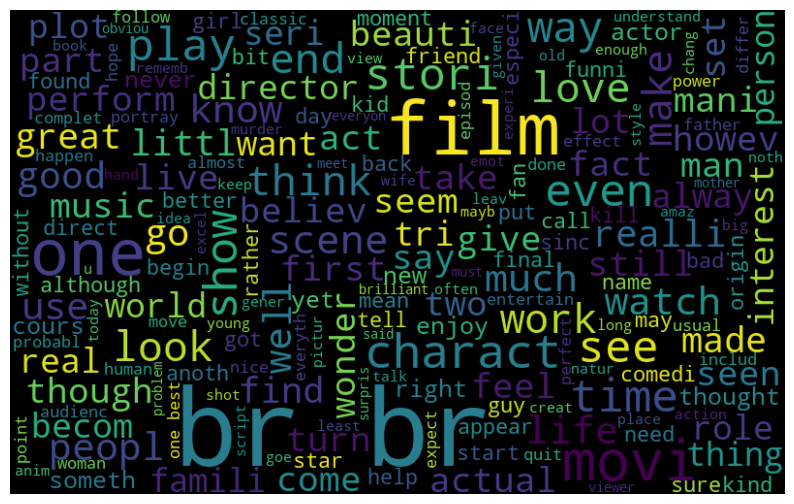

In [48]:
# word cloud for positive review words in the entire dataset
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#join all the positive reviews
positive_words = ' '.join(list(data[data['sentiment'] == 'positive']['review']))

#word cloud for positive words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

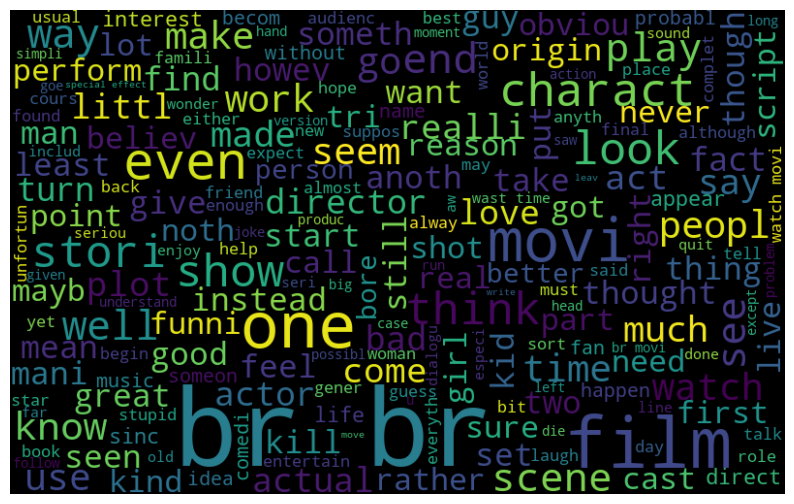

In [49]:
# TODO: Word cloud for negative reviews in the dataset
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#join all the negative reviews
negative_words = ' '.join(list(data[data['sentiment'] == 'negative']['review']))

#word cloud for negative words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()